<a href="https://colab.research.google.com/github/mokshitagupta/cse216-analysis/blob/main/Tiktok_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from time import sleep
! pip3 install app-store-scraper
! pip3 install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import json

# from app_store_scraper import AppStore
# tiktok = AppStore(country='us', app_name='tiktok', app_id = '835599320')

# tiktok.review(how_many=3000)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled req

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
ERROR:Base:Keyboard interrupted


In [ ]:
tiktokdf2 = pd.read_json('reviews_tiktok.json')
tiktokdf2 =  tiktokdf2.rename(columns={"score": "rating", "text": "review"})
tiktokdf2.head()

,id,userName,userImage,date,rating,scoreText,url,title,review,replyDate,replyText,version,thumbsUp,criterias
0,18dc3f23-8b8f-4aa4-80c1-879c9c39f26d,Abdur Rraziq,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-12-09 17:27:52.610000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,Pretty darn good aap. Love the idea of being a...,None,None,37.6.3,3385,[]
1,486b4178-2f6d-4f1f-ba4f-38d6c3dcf398,Mian Fazan,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-11-24 02:54:17.557000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,"- ""TikTok is a great and efficient app for eng...",None,None,37.4.4,22174,[]
2,17974e6e-b393-4715-972b-7c2b156911e8,Ky An,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-11-14 10:22:55.645000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,"Only issue right now, not sure if it was becau...",None,None,37.4.2,18978,[]
3,447a7fde-7bf2-4112-9a8d-22c028682fa9,Mb Mohiuddin,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-10-12 06:54:29.848000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,Pretty darn good app. Love the idea of being a...,None,None,36.7.4,33900,[]
4,97f630ef-86b7-4635-815c-50d587789a9a,Jameson Santos,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-10-14 15:00:08.652000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,It has been a while since I installed this app...,None,None,36.7.4,3965,"[{'criteria': 'vaf_delete_messages', 'rating':..."


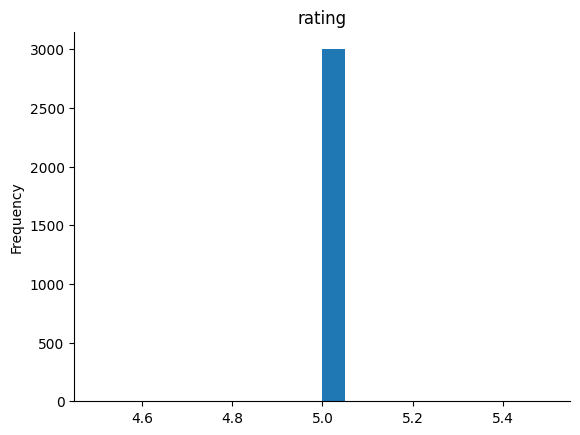

In [ ]:
# @title rating

from matplotlib import pyplot as plt
tiktokdf2['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
tiktokdf2.to_csv("data.csv")

In [ ]:
words_to_check = ['other','tiktok shop','ecommerce']
mask = [word in words_to_check for word in tiktokdf2['review'] ]
# print(mask)
tiktokdf2[mask].head()

,id,userName,userImage,date,rating,scoreText,url,title,review,replyDate,replyText,version,thumbsUp,criterias


In [ ]:
sia = SentimentIntensityAnalyzer()
tiktokdf2['sentiment'] = tiktokdf2['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

tiktokdf2['theme'] = tiktokdf2['sentiment'].apply(lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral')
tiktokdf2.head()

,id,userName,userImage,date,rating,scoreText,url,title,review,replyDate,replyText,version,thumbsUp,criterias,sentiment,theme
0,18dc3f23-8b8f-4aa4-80c1-879c9c39f26d,Abdur Rraziq,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-12-09 17:27:52.610000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,Pretty darn good aap. Love the idea of being a...,None,None,37.6.3,3385,[],0.9621,Positive
1,486b4178-2f6d-4f1f-ba4f-38d6c3dcf398,Mian Fazan,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-11-24 02:54:17.557000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,"- ""TikTok is a great and efficient app for eng...",None,None,37.4.4,22174,[],0.7650,Positive
2,17974e6e-b393-4715-972b-7c2b156911e8,Ky An,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-11-14 10:22:55.645000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,"Only issue right now, not sure if it was becau...",None,None,37.4.2,18978,[],0.7857,Positive
3,447a7fde-7bf2-4112-9a8d-22c028682fa9,Mb Mohiuddin,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-10-12 06:54:29.848000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,Pretty darn good app. Love the idea of being a...,None,None,36.7.4,33900,[],0.9860,Positive
4,97f630ef-86b7-4635-815c-50d587789a9a,Jameson Santos,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-10-14 15:00:08.652000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,It has been a while since I installed this app...,None,None,36.7.4,3965,"[{'criteria': 'vaf_delete_messages', 'rating':...",0.5267,Positive


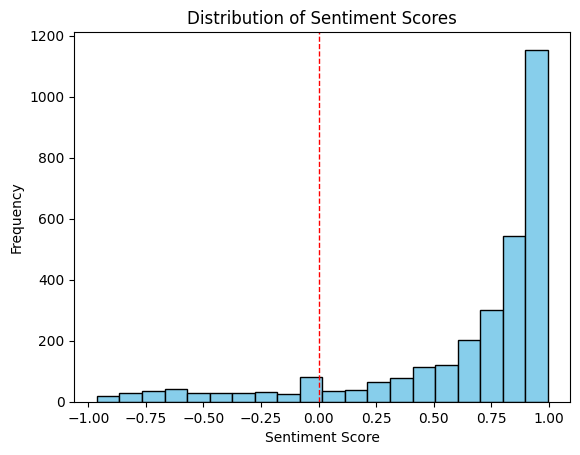

In [ ]:
plt.hist(tiktokdf2['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Add a vertical line at 0
plt.show()

<ipython-input-9-dc73b1641908>:22: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_year['month'] = df_year['date'].dt.to_period('M')
<ipython-input-9-dc73b1641908>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['month'] = df_year['date'].dt.to_period('M')
<ipython-input-9-dc73b1641908>:22: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_year['month'] = df_year['date'].dt.to_period('M')
<ipython-input-9-dc73b1641908>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

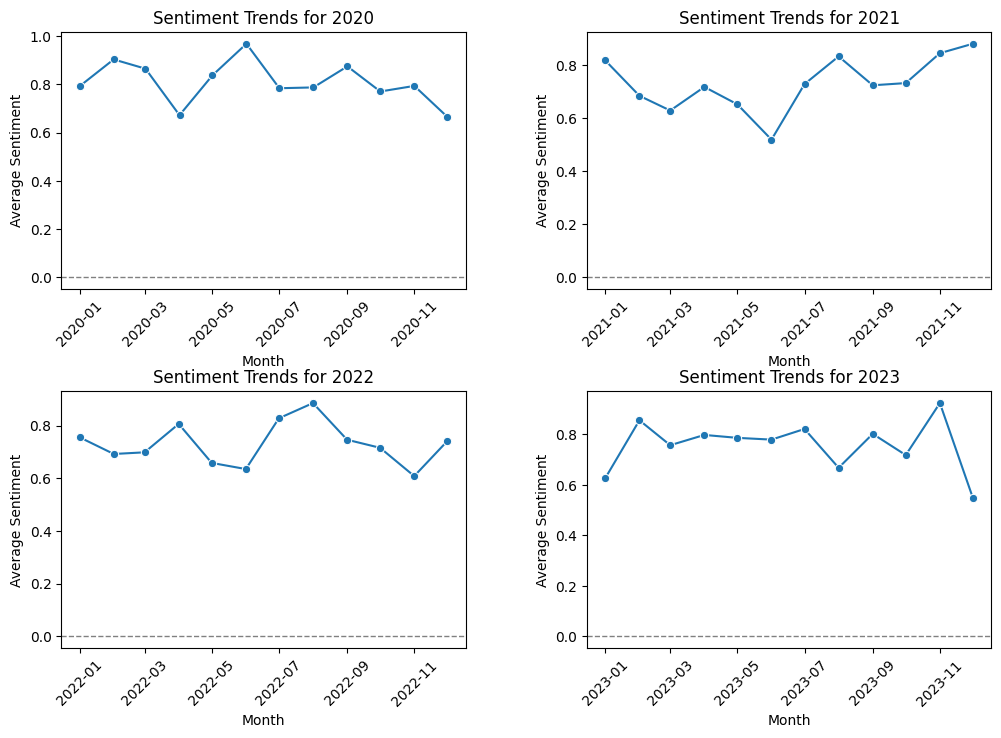

In [ ]:
import numpy as np

# Plot
import seaborn as sns
# Convert 'date' column to datetime
tiktokdf2['date'] = pd.to_datetime(tiktokdf2['date'])

# Define the range of years to plot
start_year = 2020
end_year = 2024
years = range(start_year, end_year )

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12,8), sharex=False)
axes = axes.flatten()

for i, year in enumerate(years):
    # Filter data for the current year
    df_year = tiktokdf2[tiktokdf2['date'].dt.year == year]

    # Group by month and calculate average sentiment
    df_year['month'] = df_year['date'].dt.to_period('M')
    sentiment_trends = df_year.groupby('month')['sentiment'].mean().reset_index()
    sentiment_trends['month'] = sentiment_trends['month'].dt.to_timestamp()

    # Plot sentiment trends for the current year
    sns.lineplot(x='month', y='sentiment', data=sentiment_trends, marker='o', ax=axes[i])
    axes[i].set_title(f'Sentiment Trends for {year}')
    axes[i].axhline(0, color='gray', linestyle='dashed', linewidth=1)  # Reference line at 0
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Average Sentiment')

# Adjust layout
plt.subplots_adjust(hspace=0.4, wspace=0.3)# plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Convert text to vectors
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(tiktokdf2['review'])

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
tiktokdf2['cluster'] = kmeans.fit_predict(X)

# Analyze cluster themes
for cluster in set(tiktokdf2['cluster']):
    print(f"Cluster {cluster}:")
    print(tiktokdf2[tiktokdf2['cluster'] == cluster]['review'].head())


Cluster 0:
1    - "TikTok is a great and efficient app for eng...
2    Only issue right now, not sure if it was becau...
4    It has been a while since I installed this app...
5    Love the app for communication. Also, Love It ...
7    The app has a simple and easy-to-navigate user...
Name: review, dtype: object
Cluster 1:
8     got this few months back,and it's a great app!...
10    The app has privately controls and it is more ...
12    This app is amazing. You get to be yourself an...
16    Got this a month back, and it's great app i do...
20    I love tiktok, but the latest update that was ...
Name: review, dtype: object
Cluster 2:
0     Pretty darn good aap. Love the idea of being a...
3     Pretty darn good app. Love the idea of being a...
6     Pretty darn good app. Love the idea of being a...
13    Tittle: Tik Tok Effect issue Subject: Glitch i...
14    It's fun working on TikTok It was a lot of fun...
Name: review, dtype: object


<ipython-input-11-5bba0ace221b>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  tiktokdf2['year_month'] = tiktokdf2['date'].dt.to_period('M')


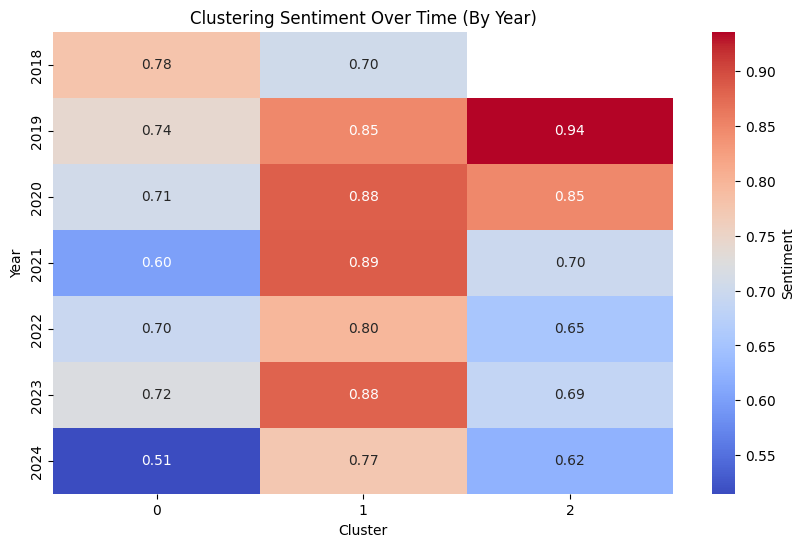

In [ ]:
# Extract the year-month from the date
tiktokdf2['year_month'] = tiktokdf2['date'].dt.to_period('M')
tiktokdf2['year'] = tiktokdf2['date'].dt.year

df_pivot = tiktokdf2.pivot_table(index='year', columns='cluster', values='sentiment', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Sentiment'})
plt.title('Clustering Sentiment Over Time (By Year)')
plt.xlabel('Cluster')
plt.ylabel('Year')
plt.show()


In [ ]:
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
import string

nltk.download('punkt_tab')
nltk.download('stopwords')


def tokenize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Convert to lowercase to standardize
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

tiktokdf2['tokens'] = tiktokdf2['review'].apply(tokenize_text)

# Create a dictionary and corpus
texts = tiktokdf2['tokens'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

n= 7

# Train LDA model
lda = LdaModel(corpus, num_topics=n, id2word=dictionary, passes=15)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Print themes
for idx, topic in lda.show_topics(num_topics=n, num_words=150, formatted=False):
    print(f"Topic {idx}: {[word for word, _ in topic]}")

Topic 0: ['tiktok', 'tik', 'tok', 'app', 'videos', 'good', 'please', 'account', 'video', 'like', 'make', 'team', 'love', 'problem', 'thank', 'get', 'thanks', 'time', 'also', 'really', "n't", 'would', 'one', 'working', 'hard', 'best', 'application', 'much', 'hello', 'live', 'quality', 'use', 'option', 'likes', 'lot', 'unfreeze', 'help', 'fun', 'people', 'posting', 'add', 'easy', 'quite', 'post', '...', 'views', 'viral', 'using', 'go', 'u', "'s", 'new', 'many', 'sounds', 'think', 'feature', 'could', 'show', 'even', 'apps', "'m", 'check', 'day', 'enjoy', 'friends', 'without', 'happy', 'upload', 'getting', 'sound', 'watching', 'followers', 'well', 'request', 'id', 'still', 'makes', 'solve', 'dear', 'different', 'need', 'send', 'give', 'see', 'page', 'able', 'better', 'experience', 'know', 'lots', 'every', 'making', 'update', 'hi', 'follow', 'made', 'nice', 'save', 'feel', 'want', 'hope', 'easily', 'world', 'username', 'helps', 'watch', 'music', 'cool', 'months', 'possible', 'version', 'ama

{'efficient': 0.3265123511488288, 'buttons': 0.0920214545249712, 'click': 1.6602923799531845e-07, 'interface': -0.007654419859336036, 'ui': 1.0106917174204433e-28, 'simple': 0.0009100782732800293, 'help': -1.0022328594425208e-32, 'scrolling': 4.324482337888839e-09, 'zoom': 0.23827973371650002, 'clean': -0.0755209186987908, 'loading': -3.3837554708212815e-10, 'drop': -0.1054044835742429, 'look': 7.447250825213793e-16, 'dark mode': -0.00011970479938438133, 'frustrating': -1.1674588349028363e-12, 'swipe': -0.00010934524319843741, 'user-friendly': 0.09984449808471804, 'smooth': 3.124893857038492e-05, 'aesthetic': 0.93470208, 'aesthetics': 0.93470208, 'tap': -2.056802918896699e-05, 'laggy': 0.1836932776805428, 'satisfying': 0.6129884602092142, 'feature-rich': 0.9694, 'tutorial': -0.060127572212576426, 'visual': 0.020168651744071196, 'responsive': -0.7061356400000001, 'menu': 0.3527, 'consistency': 0.3527, 'icons': -0.22306707807599999, 'drag': 0.63228682318004, 'font': 0.58766547795488, 'ux

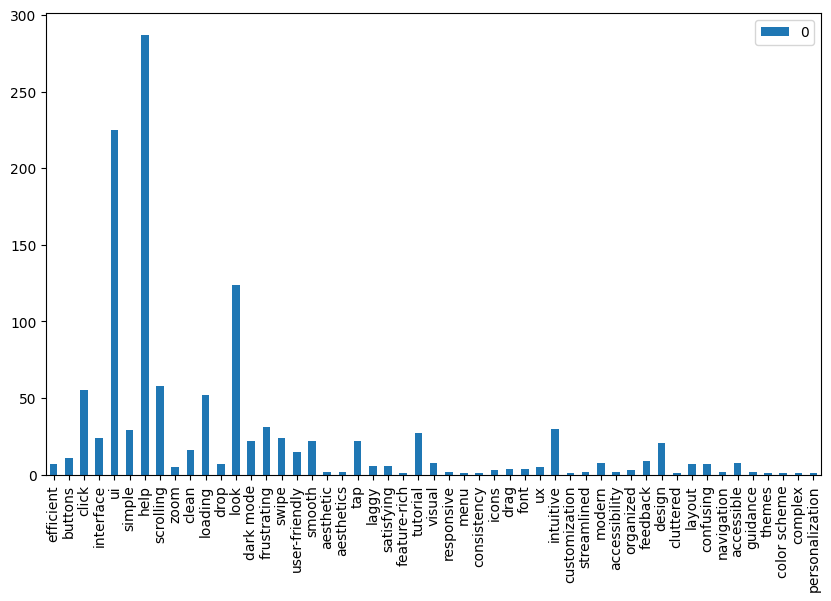

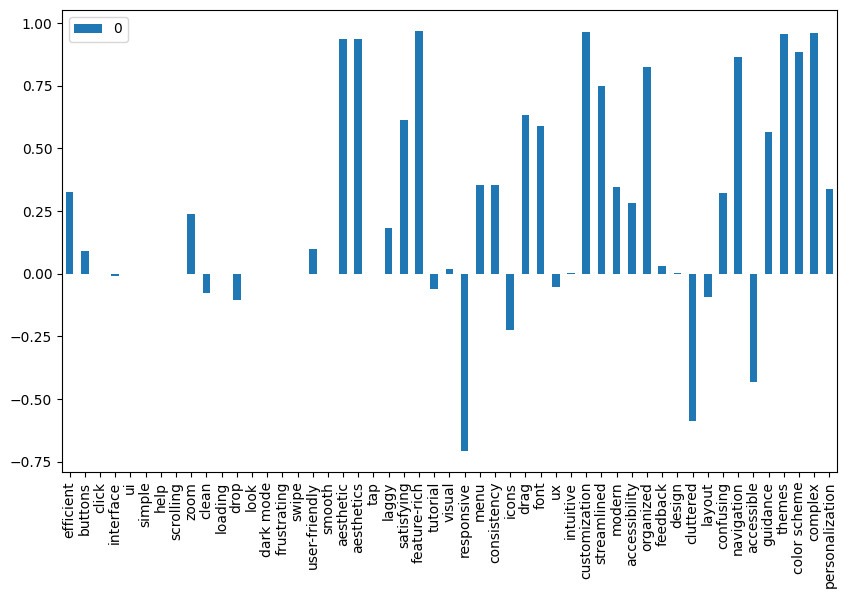

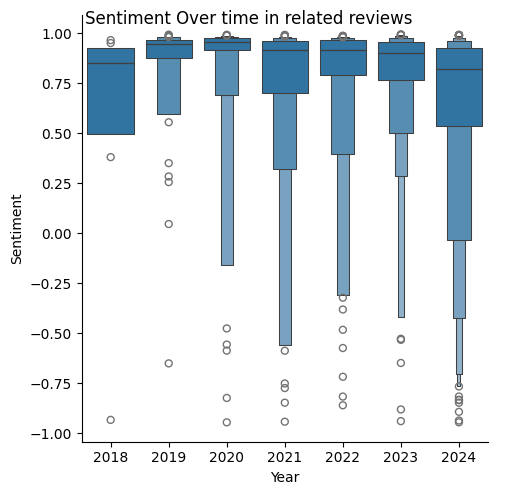

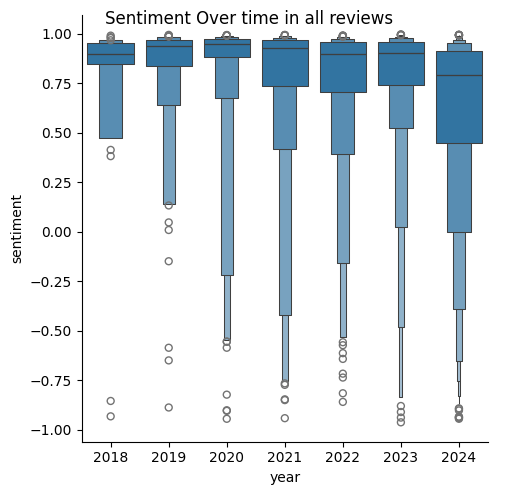

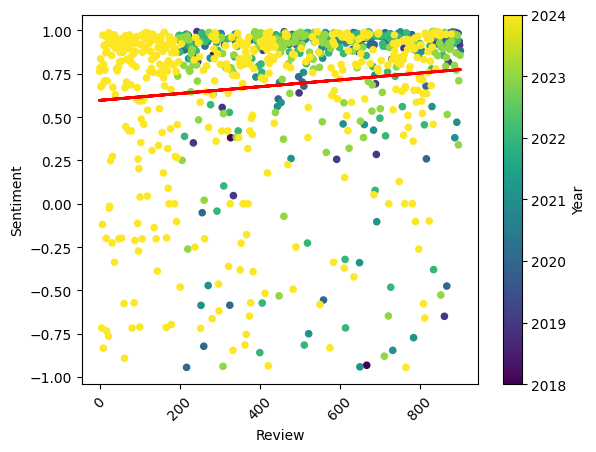

In [ ]:
from nltk.text import Text
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


plt.show()

keywords = [
    "design", "interface", "look", "layout", "aesthetic", "ui", "ux",
    "animations", "gestures", "aesthetics", "navigation", "intuitive",
    "accessibility", "accessible", "usability", "user-friendly",
    "clean", "cluttered", "organized", "confusing", "simple", "complex",
    "modern", "outdated", "responsive", "sluggish", "smooth", "laggy",
    "color scheme", "typography", "font", "readability", "legible",
    "buttons", "icons", "menu", "sidebar", "dashboard", "scrolling",
    "zoom", "pinch", "swipe", "tap", "drag", "drop", "click",
    "feedback", "visual cues", "loading", "error messages",
    "customization", "personalization", "themes", "dark mode",
    "consistency", "coherent", "intuitive", "learning curve",
    "onboarding", "tutorial", "help", "guidance","maximalist",
    "minimalist", "feature-rich", "overwhelming", "streamlined",
    "efficient", "time-consuming", "frustrating", "satisfying", "visual", "visualy"
]

# Flatten the list of tokens across all rows
all_tokens = [word for tokens in tiktokdf2['tokens'] for word in tokens]

# Join all tokens into a single string
text = Text(all_tokens)

hits = {}

senti = {}

# newdf = tiktokdf2.copy()
# Now you can call the concordance function
frq = {}
sentsp = {}
for (review, sent, yr) in zip(tiktokdf2.review, tiktokdf2.sentiment, tiktokdf2.year):
  for k in keywords:
    if k in review.lower():
      frq[k] = frq.get(k, 0) + 1
      hits[(review, sent, yr)] = hits.get((review, sent, yr), 0) + 1
      senti[review] = senti.get(review, []) + [k]
      if sent != 0:
        sentsp[k] = sentsp.get(k, 1) * sent
        # print(k, sent, sentsp[k])

# print(len(list(filter(lambda x: x is not None, sentsp))), len(sentsp))
mat = [[0 for _ in range(len(keywords))] for _ in range(len(senti))]
# print(senti.keys())
for i, entry in list(enumerate(senti.items())):
  for wd in entry[1]:
    mat[i][keywords.index(wd)] = 1

print(sentsp)
df = pd.DataFrame.from_dict(frq, orient='index')
# plt.xticks(rotation=45)
# plt.figure(figsize=(8,8))
df.plot(kind='bar', figsize=(10, 6))
df = pd.DataFrame.from_dict(sentsp, orient='index')
# plt.xticks(rotation=45)
df.plot(kind='bar', figsize=(10, 6))
  # for key in entry[1
      # print(review)
  # hits += len(text.concordance_list(key))
  # for i in text.concordance_list(key):
  #   print(i)
  # print(len(text.concordance_list(key)))
# # print(hits.values())
# years = list(set([x[2] for x in hits.keys()]))
df = pd.DataFrame(
    [(i, int(entry[0][2]),entry[0][1], entry[1]) for (i, entry) in list(enumerate(hits.items())) ],
    columns=["Review", "Year", "Sentiment", "Count"]
)
# # senti = [[0 for _ in range(len(keywords))] for _ in range(len(years))]

# # for i, row in df.iterrows():
# #   senti[years.index(row["Year"])][keywords.index(row["k"])] = row["Sentiment"



# print(df.head(), years)
g = sns.catplot(data=df, x="Year", y="Sentiment", kind="boxen")
g.fig.suptitle("Sentiment Over time in related reviews")
g2 = sns.catplot(data=tiktokdf2, x="year", y="sentiment", kind="boxen")
g2.fig.suptitle("Sentiment Over time in all reviews")

# comment_words = ' '
# stopwords = set(STOPWORDS)

# iterate through the csv file
# for val in df.review:

#    # typecaste each val to string
#    val = str(val)

#    # split the value
#    tokens = val.split()

# # Converts each token into lowercase
# for i in range(len(tokens)):
#     tokens[i] = tokens[i].lower()

# for words in tokens:
#     comment_words = comment_words + words + ' '


# wordcloud = WordCloud(width = 800, height = 800,
#             background_color ='white',
#             stopwords = stopwords,
#             min_font_size = 10).generate(comment_words)

# plot the WordCloud image
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)

df = df.sort_values(by="Year")
ax2 = df.plot.scatter(x='Review',
                      y='Sentiment',
                      c='Year',
                      colormap="viridis")
plt.xticks(rotation=45)


import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X, Y = np.array(df.Review).reshape(-1,1), np.array(df.Sentiment).reshape(-1,1)
plt.plot( X, LinearRegression().fit(X, Y).predict(X), color="red",linewidth=2)

# for i, r in df.iterrows():
#   # print(r["Sentiment"],r, years.index(r["Year"]), len(senti), years)
#   senti[years.index(r["Year"])].append((r["Review"], r["Sentiment"]))

# # print(df["Sentiment"].describe())
# print(years)
# for i in senti: print(len(i))

# glue = df.pivot(index="Review", columns="Year", values="Sentiment")
# sns.heatmap(glue)

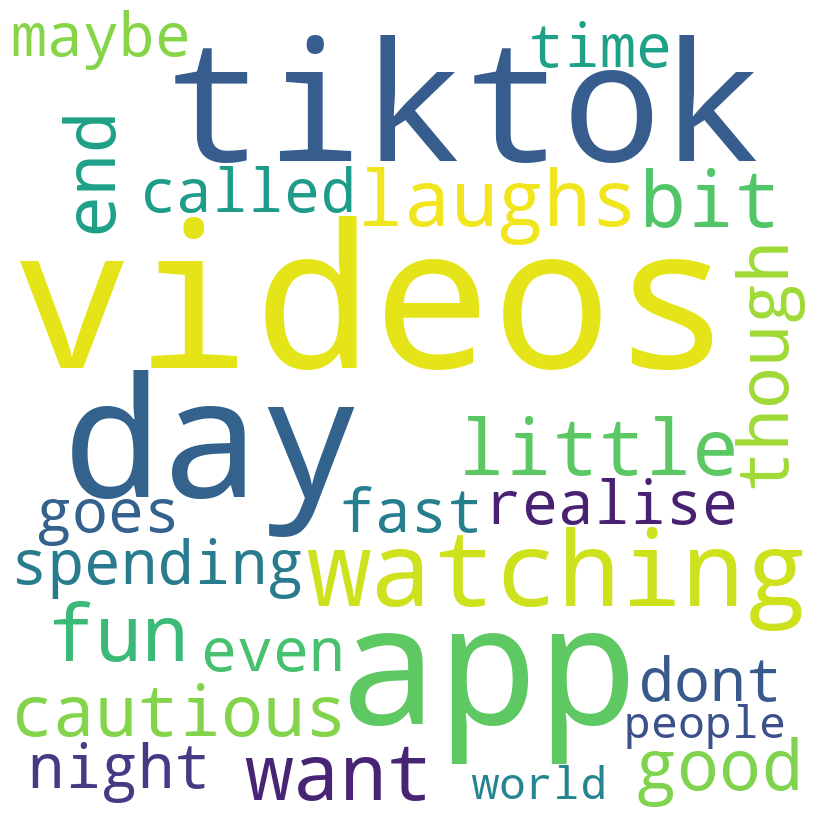

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in tiktokdf2.review:

   # typecaste each val to string
   val = str(val)

   # split the value
   tokens = val.split()

# Converts each token into lowercase
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

for words in tokens:
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = stopwords,
            min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
ser = pd.Series(' '.join(tiktokdf2['review']).lower().split()).value_counts()[:10]
ser

,count
and,5232
i,5076
the,4810
to,4285
it,3355
a,2881
is,2614
app,2249
you,2244
this,2003


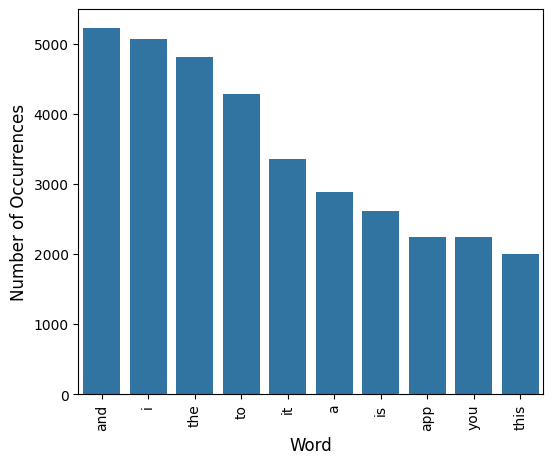

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x=ser.index, y=ser.values, ax=ax)
ax.set_ylabel('Number of Occurrences', fontsize=12)
ax.set_xlabel('Word', fontsize=12)
ax.xaxis.set_tick_params(rotation=90)

In [ ]:
!ls
%cd /content
! sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to latex Copy_of_Yet_another_copy_of_br_Processing.ipynb


Copy_of_Yet_another_copy_of_br_Processing.ipynb  data.csv	      sample_data
Copy_of_Yet_another_copy_of_br_Processing.pdf	 reviews_tiktok.json
/content
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
[NbConvertApp] Converting notebook Copy_of_Yet_another_copy_of_br_Processing.ipynb to latex
[NbConvertApp] Support files will be in Copy_of_Yet_another_copy_of_br_Processing_files/
[NbConvertApp] Making directory Copy_of_Yet_another_copy_of_br_Processing_files
[NbConvertApp] Writing 90330 bytes to Copy_of_Yet_another_copy_of_br_Processing.tex
